In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


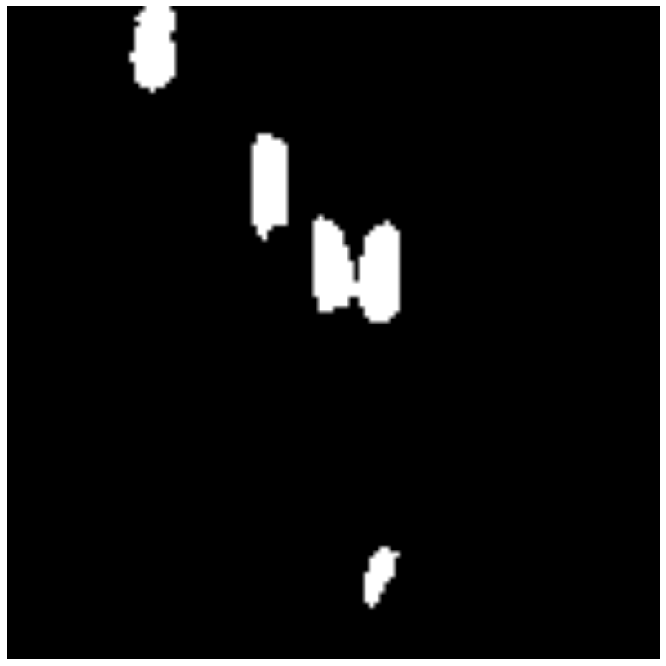

In [2]:
plt.figure(figsize = (12, 12))
plt.axis('off')
img = cv.imread('/Users/nikhilvs/repos/nyu/birds-eye-view-predictor/artifacts/data/pretrained_resnet_video_images/predicted_output/000290.png')
img = cv.resize(img, (800, 800))

plt.imshow(img)

# x, y, w, h = cv2.boundingRect(img)
# rect1 = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 255, 0), 3)
# plt.imshow(rect1)


In [3]:
import random as rng

src = img

# src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))
# source_window = 'Source'
# cv.namedWindow(source_window)
# cv.imshow(source_window, src)
max_thresh = 255
thresh = 100 # initial threshold
# cv.createTrackbar('Canny thresh:', source_window, thresh, max_thresh, thresh_callback)
# thresh_callback(thresh)

canny_output = cv.Canny(src_gray, thresh, thresh * 2)
contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv.approxPolyDP(c, 3, True)
    boundRect[i] = cv.boundingRect(contours_poly[i])
    centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])


drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)


for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    # cv.drawContours(drawing, contours_poly, i, color)
    cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
        (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
    # cv.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)


# plt.imshow(canny_output)

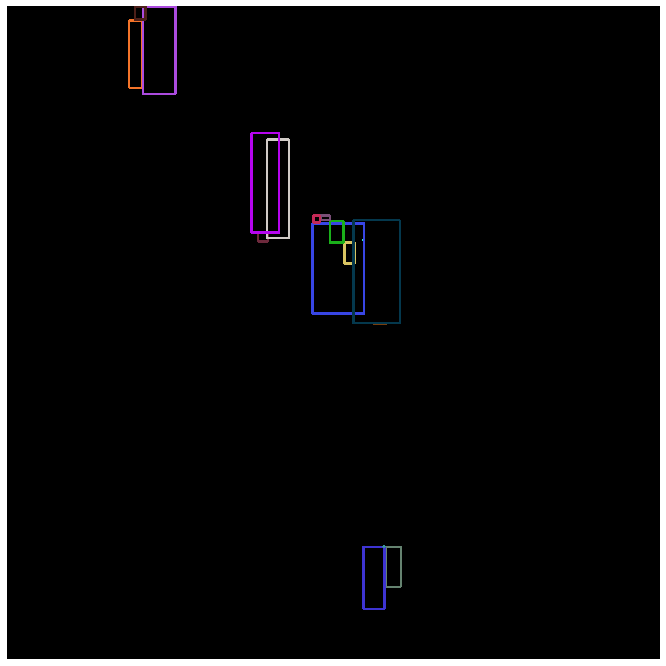

In [4]:
plt.figure(figsize = (12, 12))
plt.axis('off')

plt.imshow(drawing)

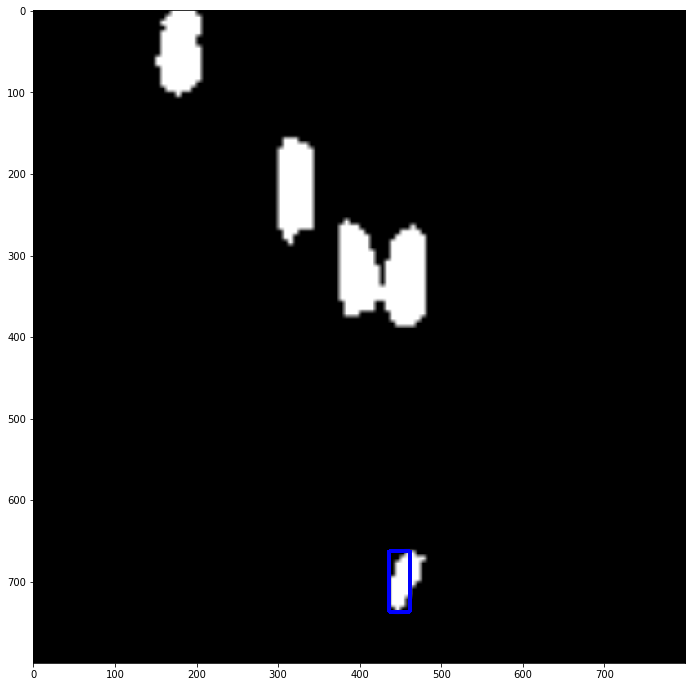

In [6]:
plt.figure(figsize = (12, 12))
# plt.axis('off')

import cv2

rect3 = cv2.minAreaRect(contours[2])
(x, y), (w, h), a = rect3 
box = cv2.boxPoints(rect3)
box = np.int0(box)
rect4 = cv2.drawContours(img.copy(), [box], 0, (0, 0, 255), 3)
plt.imshow(rect4)

In [7]:
box

array([[436, 737],
       [436, 662],
       [461, 662],
       [461, 737]])

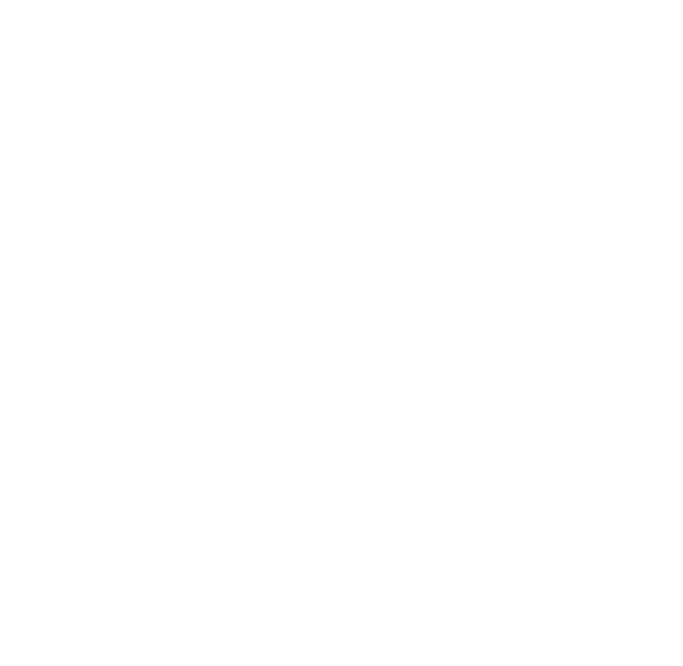

In [20]:
plt.figure(figsize = (12, 12))
plt.axis('off')

views = ['back', 'back_left', 'back_right', 'front', 'front_left', 'front_right']
epoch = [170, 300, 295, 400, 250, 250]
mono_dir = '/Users/nikhilvs/repos/nyu/birds-eye-view-predictor/artifacts/mono/outputs'

offset_map = {
    'front' : (400 * 2, 200 * 2),
    'front_left' : (400 * 2, 0),
    'front_right' : (400 * 2, 400 * 2),
    'back' : (0, 200 * 2),
    'back_left' : (0, 0),
    'back_right' : (0, 400 * 2)
}

img = '000290.png'

back = cv2.imread(os.path.join(mono_dir, views[0] + '_' + str(epoch[0]), img))
back_left = cv2.imread(os.path.join(mono_dir, views[1] + '_' + str(epoch[1]), img))
back_right = cv2.imread(os.path.join(mono_dir, views[2] + '_' + str(epoch[2]), img))
front = cv2.imread(os.path.join(mono_dir, views[3] + '_' + str(epoch[3]), img))
front_left = cv2.imread(os.path.join(mono_dir, views[4] + '_' + str(epoch[4]), img))
front_right = cv2.imread(os.path.join(mono_dir, views[5] + '_' + str(epoch[5]), img))

back = cv2.resize(back, (800, 800))
back_left = cv2.resize(back_left, (800, 800))
back_right = cv2.resize(back_right, (800, 800))
front = cv2.resize(front, (800, 800))
front_left = cv2.resize(front_left, (800, 800))
front_right = cv2.resize(front_right, (800, 800))




blank_image = np.zeros((1600, 1600, 3), np.uint8)
# blank_image[
#     offset_map['back_left'][1] : offset_map['back_left'][1] + back_left.shape[0], 
#     offset_map['back_left'][0] : offset_map['back_left'][0] + back_left.shape[1]
# ] = back_left

# blank_image[
#     offset_map['back_right'][1] : offset_map['back_right'][1] + back_right.shape[0], 
#     offset_map['back_right'][0] : offset_map['back_right'][0] + back_right.shape[1]
# ] = back_right

# blank_image[
#     offset_map['back'][1] : offset_map['back'][1] + back.shape[0], 
#     offset_map['back'][0] : offset_map['back'][0] + back.shape[1]
# ] = back

front = cv2.rotate(front, cv2.ROTATE_90_CLOCKWISE)

blank_image[
    offset_map['front'][1] : offset_map['front'][1] + front.shape[0], 
    offset_map['front'][0] : offset_map['front'][0] + front.shape[1]
] = front

# blank_image[
#     offset_map['front_left'][1] : offset_map['front_left'][1] + front_left.shape[0], 
#     offset_map['front_left'][0] : offset_map['front_left'][0] + front_left.shape[1]
# ] = front_left

# blank_image[
#     offset_map['front_right'][1] : offset_map['front_right'][1] + front_right.shape[0], 
#     offset_map['front_right'][0] : offset_map['front_right'][0] + front_right.shape[1]
# ] = front_right


# img = cv.imread('/Users/nikhilvs/repos/nyu/birds-eye-view-predictor/artifacts/data/pretrained_resnet_video_images/predicted_output/000290.png')

In [21]:
import random as rng


def bb(img):
    src = img

    # src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    src_gray = cv.blur(src_gray, (3,3))
    # source_window = 'Source'
    # cv.namedWindow(source_window)
    # cv.imshow(source_window, src)
    max_thresh = 255
    thresh = 100 # initial threshold
    # cv.createTrackbar('Canny thresh:', source_window, thresh, max_thresh, thresh_callback)
    # thresh_callback(thresh)

    canny_output = cv.Canny(src_gray, thresh, thresh * 2)
    contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv.approxPolyDP(c, 3, True)
        boundRect[i] = cv.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])


    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

    boxes = np.zeros((len(contours), 4))

    for i in range(len(contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        # cv.drawContours(drawing, contours_poly, i, color)
        cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
            (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
        # cv.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)

        # rect3 = cv2.minAreaRect(contours[i])
        # (x, y), (w, h), a = rect3 
        # box = cv2.boxPoints(rect3)
        # box = np.int0(box)
        # boxes[i, :, :] = box

        boxes[i] = np.array(
            (
                int(boundRect[i][0]), 
                int(boundRect[i][1]), 
                int(boundRect[i][0]+boundRect[i][2]), 
                int(boundRect[i][1]+boundRect[i][3])
            )
        )

    return drawing, contours, boundRect, boxes

In [14]:
def non_max_suppression_fast(boxes, overlapThresh = 0.3):
	# if there are no boxes, return an empty list
	if len(boxes) == 0:
		return []
	# if the bounding boxes integers, convert them to floats --
	# this is important since we'll be doing a bunch of divisions
	if boxes.dtype.kind == "i":
		boxes = boxes.astype("float")
	# initialize the list of picked indexes	
	pick = []
	# grab the coordinates of the bounding boxes
	x1 = boxes[:,0]
	y1 = boxes[:,1]
	x2 = boxes[:,2]
	y2 = boxes[:,3]
	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = np.argsort(y2)
	# keep looping while some indexes still remain in the indexes
	# list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the
		# index value to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)
		# find the largest (x, y) coordinates for the start of
		# the bounding box and the smallest (x, y) coordinates
		# for the end of the bounding box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])
		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)
		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]
		# delete all indexes from the index list that have
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > overlapThresh)[0])))
	# return only the bounding boxes that were picked using the
	# integer data type
	return boxes[pick].astype("int")

In [118]:
# 4 x 2
def transform_box(box):
    xs = box[:, 0]
    ys = box[:, 1]

    return (np.min(xs), np.min(ys), np.max(xs), np.max(ys))

def non_max_suppression_boxes(boxes):
    n_boxes = np.zeros((len(boxes), 4))
    for i in range(len(boxes)):
        box = transform_box(boxes[i])
        n_boxes[i] = np.array(box)
        

    return n_boxes


In [56]:
drawing, contours, boundRect, boxes = bb(blank_image)
# n_boxes = non_max_suppression_boxes(boxes)
m_boxes = non_max_suppression_fast(boxes, 0.1)

In [66]:
import torch

z = torch.zeros(1, 1, 2, 3)

x = torch.tensor([[1, 2, 3], [3, 4, 5]])
z[0, 0] = x

In [57]:
boxes/2

array([[608. , 437. , 654.5, 437.5],
       [603. , 433.5, 607.5, 437.5],
       [444.5, 431.5, 454.5, 438. ],
       [469. , 424.5, 469.5, 438. ],
       [603. , 421. , 606. , 433. ],
       [431. , 419. , 468.5, 440.5],
       [643. , 418. , 643.5, 418.5],
       [627.5, 418. , 663. , 437.5],
       [636. , 418.5, 639. , 419. ],
       [630.5, 418. , 631. , 418.5],
       [455.5, 418. , 456. , 418.5],
       [443. , 418. , 443.5, 418.5],
       [606.5, 415. , 627.5, 421. ],
       [620.5, 406.5, 665. , 412.5],
       [665. , 392.5, 678. , 406. ],
       [615. , 384. , 675.5, 412.5],
       [669. , 358.5, 737.5, 375. ],
       [668. , 355.5, 668.5, 363.5],
       [668.5, 349.5, 737.5, 358. ],
       [745.5, 299.5, 792. , 303. ],
       [744. , 297.5, 745. , 300. ],
       [792.5, 290. , 800. , 300. ],
       [743. , 286.5, 743.5, 297.5],
       [788.5, 278.5, 800. , 287.5],
       [744. , 275. , 757.5, 287. ],
       [758. , 274.5, 788.5, 278. ]])

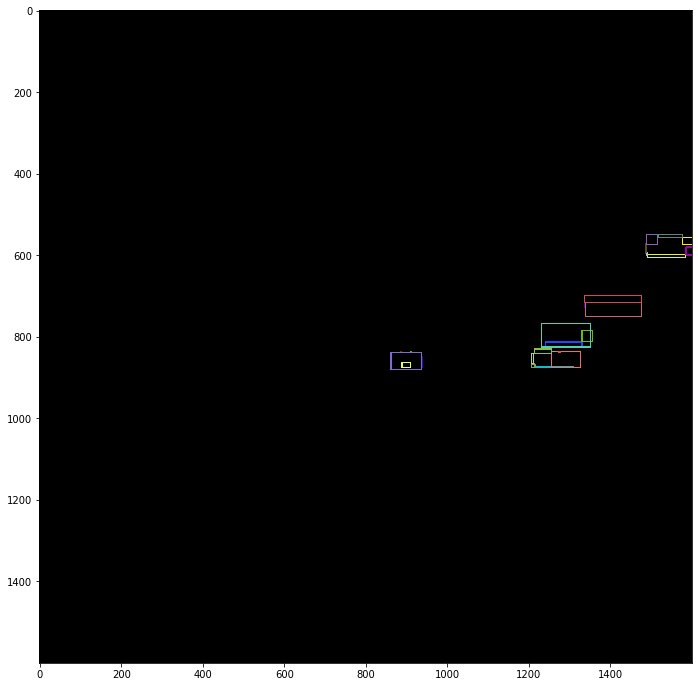

In [58]:
plt.figure(figsize = (12, 12))

# plt.scatter(x = [368, 425], y = [249, 369])
plt.imshow(drawing)

In [59]:
boxes

array([[1216.,  874., 1309.,  875.],
       [1206.,  867., 1215.,  875.],
       [ 889.,  863.,  909.,  876.],
       [ 938.,  849.,  939.,  876.],
       [1206.,  842., 1212.,  866.],
       [ 862.,  838.,  937.,  881.],
       [1286.,  836., 1287.,  837.],
       [1255.,  836., 1326.,  875.],
       [1272.,  837., 1278.,  838.],
       [1261.,  836., 1262.,  837.],
       [ 911.,  836.,  912.,  837.],
       [ 886.,  836.,  887.,  837.],
       [1213.,  830., 1255.,  842.],
       [1241.,  813., 1330.,  825.],
       [1330.,  785., 1356.,  812.],
       [1230.,  768., 1351.,  825.],
       [1338.,  717., 1475.,  750.],
       [1336.,  711., 1337.,  727.],
       [1337.,  699., 1475.,  716.],
       [1491.,  599., 1584.,  606.],
       [1488.,  595., 1490.,  600.],
       [1585.,  580., 1600.,  600.],
       [1486.,  573., 1487.,  595.],
       [1577.,  557., 1600.,  575.],
       [1488.,  550., 1515.,  574.],
       [1516.,  549., 1577.,  556.]])

In [60]:

out = blank_image.copy()

for i in range(len(m_boxes)):
    box = m_boxes[i]
    start = int(box[0]), int(box[1])
    end = int(box[2]), int(box[3])
    cv2.rectangle(out, start, end, (255, 0, 0), 2)


In [61]:
m_boxes.shape

(20, 4)

In [62]:
boxes.shape

(26, 4)

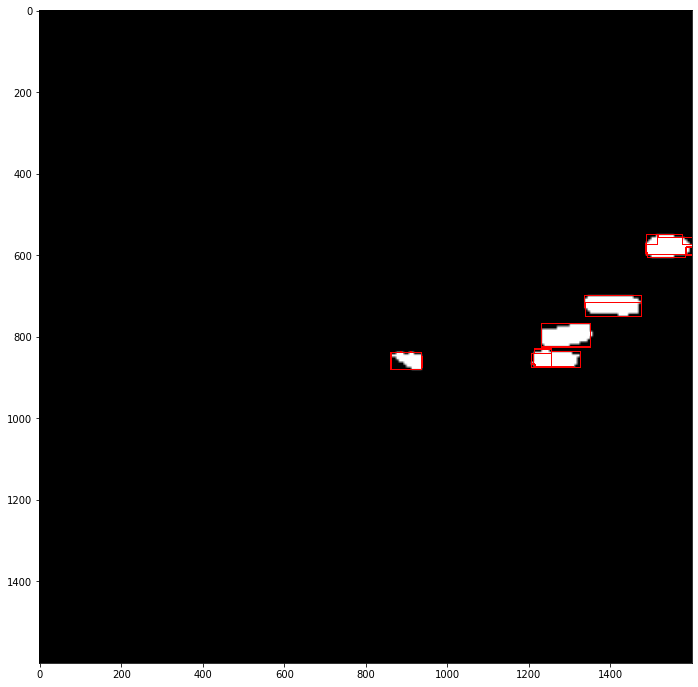

In [63]:
plt.figure(figsize = (12, 12))
plt.imshow(out)

In [ ]:
b=

In [111]:
m_boxes

array([[182, 151, 206, 226],
       [180, 199, 181, 200]])

In [124]:
front_nms = front.copy()

for i in range(len(m_boxes)):
    box = m_boxes[i]
    start = box[0], box[1]
    end = box[2], box[3]
    front_nms = cv.rectangle(front_nms, start, end, color = (255, 0, 0))

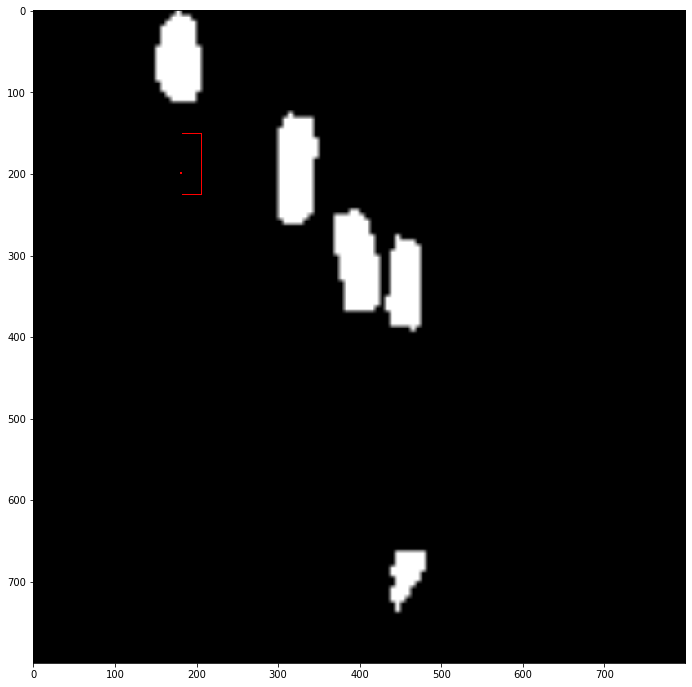

In [125]:
plt.figure(figsize = (12, 12))

plt.imshow(front_nms)

In [113]:
front_nms_1 = front.copy()

for i in range(len(boxes)):
    box = boxes[i]
    start = int(box[0]), int(box[1])
    end = int(box[2]), int(box[3])
    front_nms_1 = cv2.rectangle(front_nms_1, start, end, (255, 0, 0), 2)

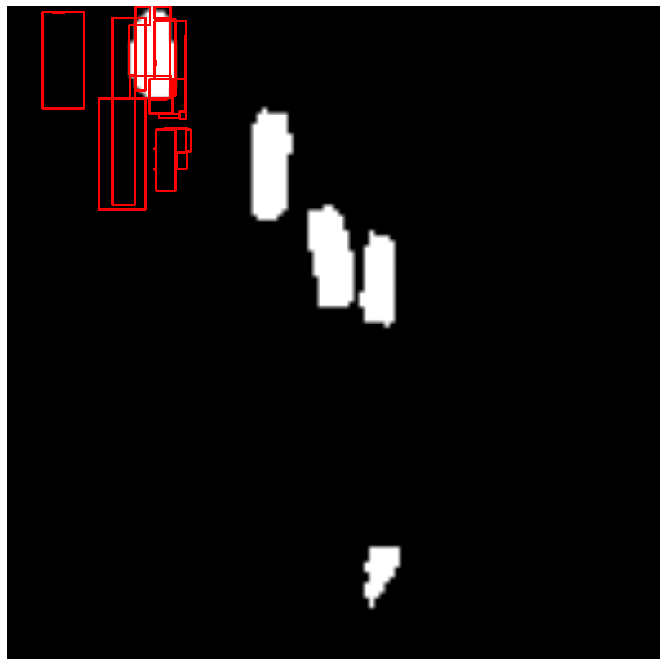

In [114]:
plt.figure(figsize = (12, 12))
plt.axis('off')


plt.imshow(front_nms_1)

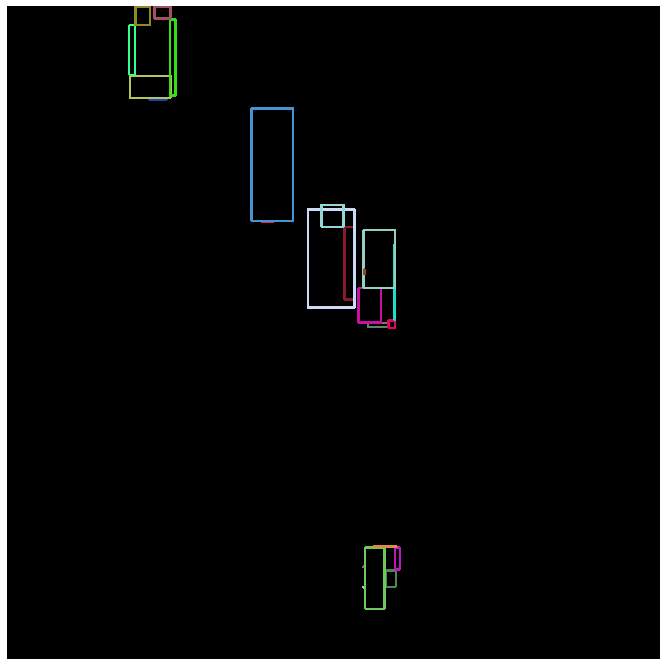

In [115]:
plt.figure(figsize = (12, 12))
plt.axis('off')


plt.imshow(drawing)

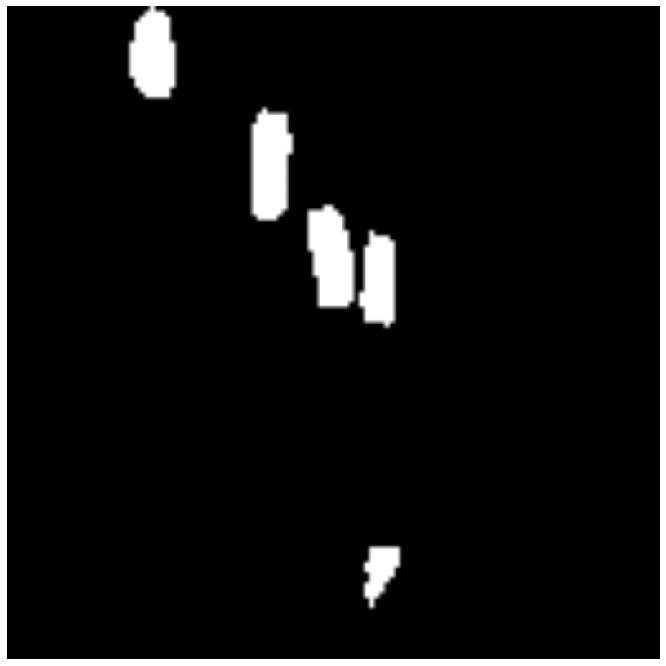

In [40]:
plt.figure(figsize = (12, 12))
plt.axis('off')


plt.imshow(front)

In [ ]:


def non_max_suppression(boxes, scores, threshold):
    """Performs non-maximum suppression and returns indices of kept boxes.
    boxes: [N, (y1, x1, y2, x2)]. Notice that (y2, x2) lays outside the box.
    scores: 1-D array of box scores.
    threshold: Float. IoU threshold to use for filtering.
    """
    assert boxes.shape[0] > 0
    if boxes.dtype.kind != "f":
        boxes = boxes.astype(np.float32)

    # Compute box areas
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    area = (y2 - y1) * (x2 - x1)

    # Get indicies of boxes sorted by scores (highest first)
    ixs = scores.argsort()[::-1]

    pick = []
    while len(ixs) > 0:
        # Pick top box and add its index to the list
        i = ixs[0]
        pick.append(i)
        # Compute IoU of the picked box with the rest
        iou = compute_iou(boxes[i], boxes[ixs[1:]], area[i], area[ixs[1:]])
        # Identify boxes with IoU over the threshold. This
        # returns indices into ixs[1:], so add 1 to get
        # indices into ixs.
        remove_ixs = np.where(iou > threshold)[0] + 1
        # Remove indices of the picked and overlapped boxes.
        ixs = np.delete(ixs, remove_ixs)
        ixs = np.delete(ixs, 0)
    return np.array(pick, dtype=np.int32)

def compute_iou(box, boxes, box_area, boxes_area):
    """Calculates IoU of the given box with the array of the given boxes.
    box: 1D vector [y1, x1, y2, x2]
    boxes: [boxes_count, (y1, x1, y2, x2)]
    box_area: float. the area of 'box'
    boxes_area: array of length boxes_count.
    Note: the areas are passed in rather than calculated here for
    efficiency. Calculate once in the caller to avoid duplicate work.
    """
    # Calculate intersection areas
    y1 = np.maximum(box[0], boxes[:, 0])
    y2 = np.minimum(box[2], boxes[:, 2])
    x1 = np.maximum(box[1], boxes[:, 1])
    x2 = np.minimum(box[3], boxes[:, 3])
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    union = box_area + boxes_area[:] - intersection[:]
    iou = intersection / union
    return iou